In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('titanic.csv')


In [3]:
data = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data = data.fillna(data.mean())  

X = data.drop('Survived', axis=1).values
y = data['Survived'].values.reshape(-1, 1)

scaler = StandardScaler()
X = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
input_size = X_train.shape[1]
hidden_size = 10
output_size = 1
learning_rate = 0.01

W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))


In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0) * 1

def forward_pass(X):
    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)
    return z1, a1, z2, a2

In [7]:
def backward_pass(X, y, z1, a1, z2, a2):
    m = X.shape[0]
    dz2 = a2 - y
    dW2 = (1 / m) * np.dot(a1.T, dz2)
    db2 = (1 / m) * np.sum(dz2, axis=0, keepdims=True)
    dz1 = np.dot(dz2, W2.T) * relu_derivative(z1)
    dW1 = (1 / m) * np.dot(X.T, dz1)
    db1 = (1 / m) * np.sum(dz1, axis=0, keepdims=True)

    return dW1, db1, dW2, db2


In [8]:
losses = []
epochs = 50
for epoch in range(epochs):
    z1, a1, z2, a2 = forward_pass(X_train)
    dW1, db1, dW2, db2 = backward_pass(X_train, y_train, z1, a1, z2, a2)

    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    loss = -np.mean(y_train * np.log(a2) + (1 - y_train) * np.log(1 - a2))
    losses.append(loss)

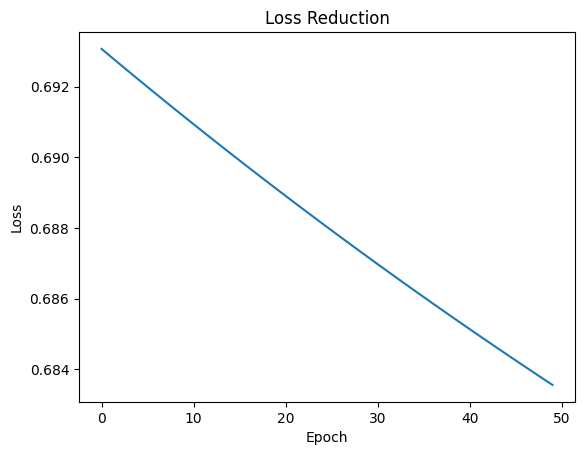

In [9]:
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Reduction')
plt.show()